In [213]:
!pip install pycaret[full] &> /dev/null

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
from pycaret.utils import version
version()
from pycaret.clustering import *
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [216]:
result_df_kmeans = pd.DataFrame()
result_df_hclust = pd.DataFrame()
result_df_birch = pd.DataFrame()

In [217]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales_transaction.csv")

In [218]:
data_df.head(10)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9
5,P6,3,3,2,7,6,3,8,6,6,...,4,2,4,3,6,5,3,3,10,6
6,P7,4,8,3,7,8,7,2,3,10,...,2,3,3,6,2,6,2,4,2,1
7,P8,8,6,10,9,6,8,7,5,10,...,10,14,4,8,8,6,7,4,9,9
8,P9,14,9,10,7,11,15,12,7,13,...,11,5,13,3,7,7,10,12,7,13
9,P10,22,19,19,29,20,16,26,20,24,...,14,17,11,24,13,16,18,23,18,20


# **KMeans Clustering**



In [253]:
## KMeans Clustering
kMeansParameters = setup(data_df, verbose=False)
KMeansModel = create_model('kmeans')
kMeansPrediction = assign_model(KMeansModel)
kMeansPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5674,2558.6838,0.8634,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,Cluster
0,P1,11,12,10,8,13,12,14,21,6,...,7,8,10,12,3,7,6,5,10,Cluster 0
1,P2,7,6,3,2,7,1,6,3,3,...,4,5,1,1,4,5,1,6,0,Cluster 2
2,P3,7,11,8,9,10,8,7,13,12,...,14,5,5,7,8,14,8,8,7,Cluster 0
3,P4,12,8,13,5,9,6,9,13,13,...,10,3,4,6,8,14,8,7,8,Cluster 0
4,P5,8,5,13,11,6,7,9,14,9,...,11,7,12,6,6,5,11,8,9,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,1,1,0,0,1,0,0,2,0,Cluster 2
807,P816,0,1,0,0,1,2,2,6,0,...,3,4,2,4,5,5,5,6,5,Cluster 2
808,P817,1,0,0,0,1,1,2,1,1,...,0,0,2,2,0,0,0,4,3,Cluster 2
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,2,0,Cluster 2


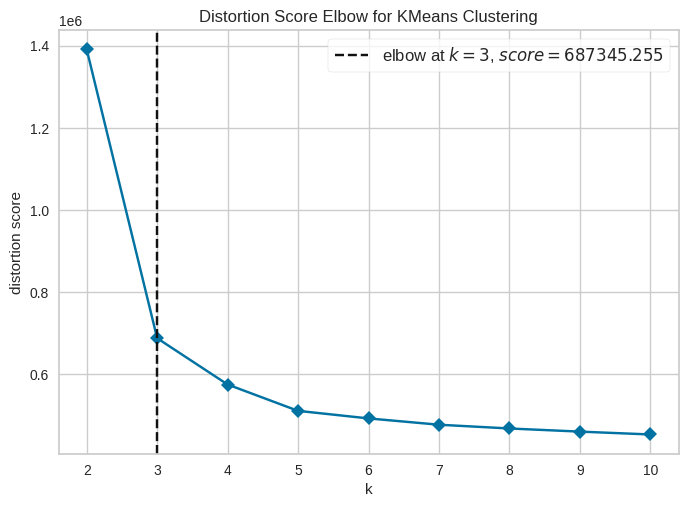

In [220]:
plot_model(KMeansModel, plot = 'elbow')

In [221]:
## No PreProcessing
setup(data_df, verbose=False)

print("For Cluster = 3")
KMeansModel_3 = create_model('kmeans', num_clusters = 3)
model_summary_kmeans3 = pull()

print("For Cluster = 4")
KMeansModel_4 = create_model('kmeans', num_clusters = 4)
model_summary_kmeans4 = pull()

print("For Cluster = 5")
KMeansModel_5 = create_model('kmeans', num_clusters = 5)
model_summary_kmeans5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6144,3145.6844,0.6265,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5674,2558.6838,0.8634,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4539,2183.2716,0.9211,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [222]:
for i in range(3, 6):
    variable_name = f"model_summary_kmeans{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6144          3145.6844          0.6265            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.5674          2558.6838          0.8634            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4539          2183.2716          0.9211            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0102,16.5033,8.4001,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

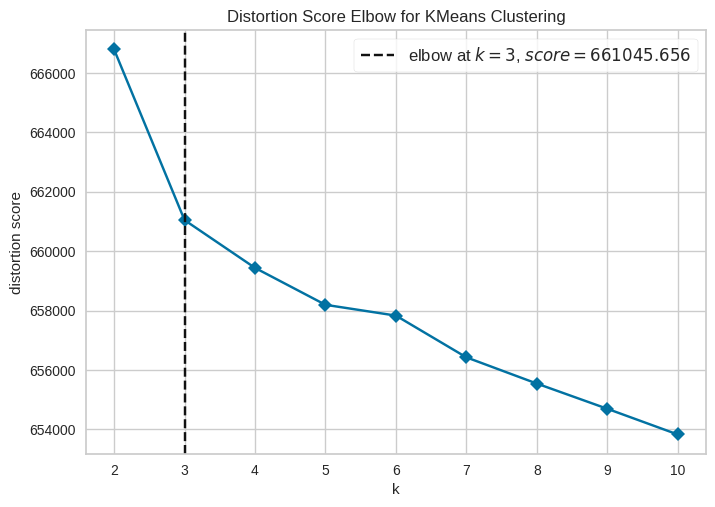

In [223]:
## Performance using Normalisation
setup(data = data_df, normalize = True, normalize_method = 'zscore', verbose=False)
KMeansModel_norm = create_model('kmeans', num_clusters = 4)
plot_model(KMeansModel_norm, plot = 'elbow')

In [224]:
setup(data = data_df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
KMeansModel_norm_3 = create_model('kmeans', num_clusters = 3)
model_summary_kmeans_norm_3 = pull()

print("For Cluster = 4")
KMeansModel_norm_4 = create_model('kmeans', num_clusters = 4)
model_summary_kmeans_norm_4 = pull()

print("For Cluster = 5")
KMeansModel_norm_5 = create_model('kmeans', num_clusters = 5)
model_summary_kmeans_norm_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0170,23.7417,7.2715,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0100,16.5085,8.4782,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0059,12.7613,12.0162,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [225]:
for i in range(3, 6):
    variable_name = f"model_summary_kmeans_norm_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.017            23.7417          7.2715            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0        0.01            16.5085          8.4782            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0059            12.7613         12.0162            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4819,2072.6789,0.8239,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

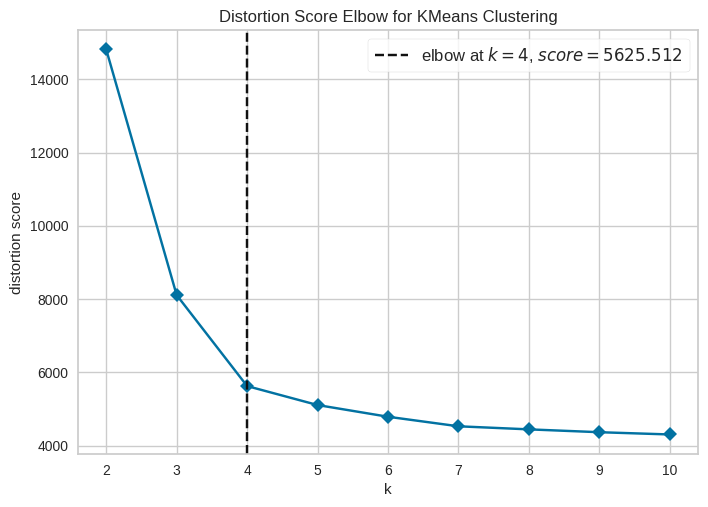

In [226]:
## Performance using Transformation
setup(data = data_df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
KMeansModel_transformation = create_model('kmeans')
plot_model(KMeansModel_transformation, plot = 'elbow')

In [227]:
setup(data = data_df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
KMeansModel_transformation_3 = create_model('kmeans', num_clusters = 3)
model_summary_kmeans_transformation_3 = pull()

print("For Cluster = 4")
KMeansModel_transformation_4 = create_model('kmeans', num_clusters = 4)
model_summary_kmeans_transformation_4 = pull()

print("For Cluster = 5")
KMeansModel_transformation_5 = create_model('kmeans', num_clusters = 5)
model_summary_kmeans_transformation_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4945,2035.5588,0.7787,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4819,2072.6789,0.8239,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3908,1730.4418,1.2194,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [228]:
for i in range(3, 6):
    variable_name = f"model_summary_kmeans_transformation_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4945          2035.5588          0.7787            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4819          2072.6789          0.8239            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.3908          1730.4418          1.2194            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5674,2558.6838,0.8634,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

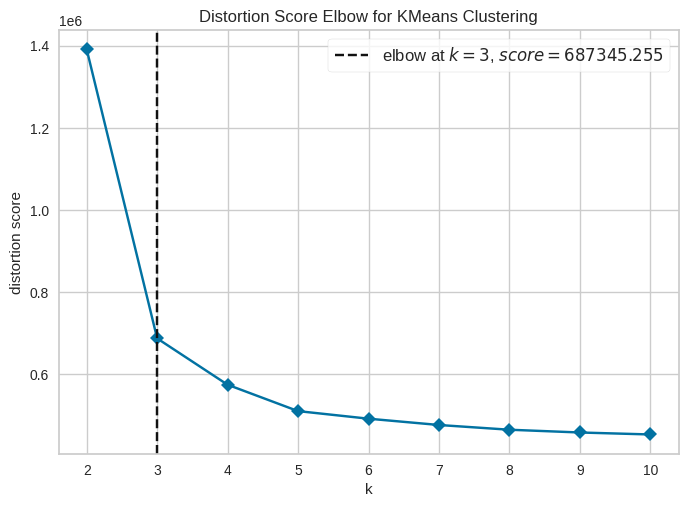

In [229]:
## ## Performance using PCA
setup(data = data_df, pca = True, pca_method = 'linear', verbose=False)
KMeansModel_pca = create_model('kmeans')
plot_model(KMeansModel_pca, plot = 'elbow')

In [230]:
setup(data = data_df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
KMeansModel_pca_3 = create_model('kmeans', num_clusters = 3)
model_summary_kmeans_pca_3 = pull()

print("For Cluster = 4")
KMeansModel_pca_4 = create_model('kmeans', num_clusters = 4)
model_summary_kmeans_pca_4 = pull()

print("For Cluster = 5")
KMeansModel_pca_5 = create_model('kmeans', num_clusters = 5)
model_summary_kmeans_pca_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6144,3145.6844,0.6265,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5674,2558.6838,0.8634,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4539,2183.2716,0.9211,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [231]:
for i in range(3, 6):
    variable_name = f"model_summary_kmeans_pca_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6144          3145.6844          0.6265            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.5674          2558.6838          0.8634            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4539          2183.2716          0.9211            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0106,16.1872,8.6284,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

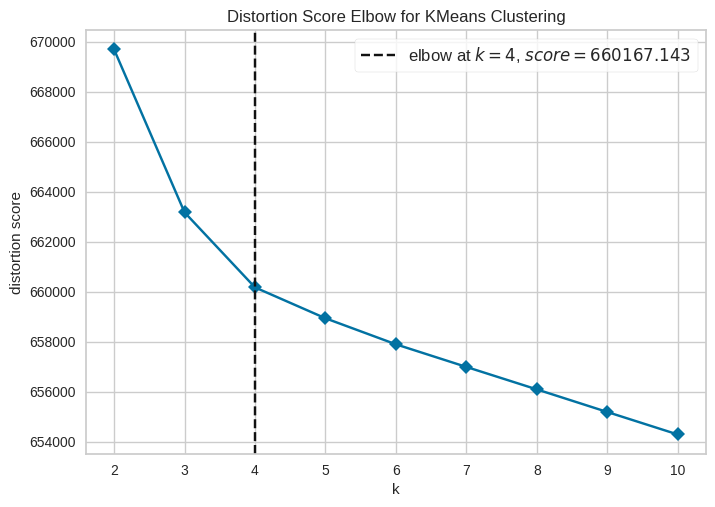

In [232]:
## Performance using "Transformation" + "Normalization"
setup(data = data_df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
KMeansModel_TN = create_model('kmeans')
plot_model(KMeansModel_TN, plot = 'elbow')

In [233]:
setup(data = data_df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
KMeansModel_TN_3 = create_model('kmeans', num_clusters = 3)
model_summary_kmeans_TN_3 = pull()

print("For Cluster = 4")
KMeansModel_TN_4 = create_model('kmeans', num_clusters = 4)
model_summary_kmeans_TN_4 = pull()

print("For Cluster = 5")
KMeansModel_TN_5 = create_model('kmeans', num_clusters = 5)
model_summary_kmeans_TN_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0160,22.3975,7.2578,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0105,16.1925,8.6266,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0053,12.5145,10.0257,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [234]:
for i in range(3, 6):
    variable_name = f"model_summary_kmeans_TN_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.016            22.3975          7.2578            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0105            16.1925          8.6266            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0053            12.5145         10.0257            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0102,16.1810,8.8375,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

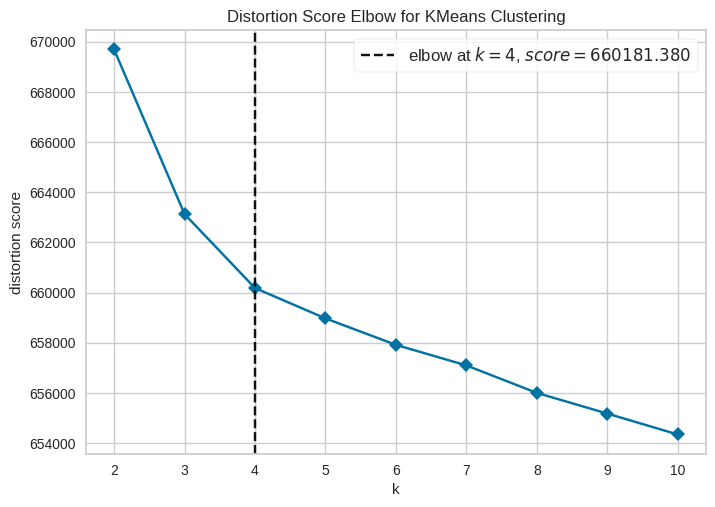

In [235]:
## Performance using "Transformation" + "Normalization" + "PCA"

setup(data = data_df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
KMeansModel_TNP = create_model('kmeans')
plot_model(KMeansModel_TNP, plot = 'elbow')

In [236]:
setup(data = data_df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
KMeansModel_TNP_3 = create_model('kmeans', num_clusters = 3)
model_summary_kmeans_TNP_3 = pull()

print("For Cluster = 4")
KMeansModel_TNP_4 = create_model('kmeans', num_clusters = 4)
model_summary_kmeans_TNP_4 = pull()

print("For Cluster = 5")
KMeansModel_TNP_5 = create_model('kmeans', num_clusters = 5)
model_summary_kmeans_TNP_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0160,22.3975,7.2424,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0105,16.1824,8.7465,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0052,12.5087,10.2655,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [237]:
for i in range(3, 6):
    variable_name = f"model_summary_kmeans_TNP_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.016            22.3975          7.2424            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0105            16.1824          8.7465            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0052            12.5087         10.2655            0           0   

   Completeness  
0             0  


# **Agglomerative Clustering**

In [256]:
## Agglomerative Clustering

hclustParameters = setup(data_df, verbose=False)
hclustModel = create_model('hclust')
hclustPrediction = assign_model(hclustModel)
hclustPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5684,2540.1674,0.8769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,Cluster
0,P1,11,12,10,8,13,12,14,21,6,...,7,8,10,12,3,7,6,5,10,Cluster 2
1,P2,7,6,3,2,7,1,6,3,3,...,4,5,1,1,4,5,1,6,0,Cluster 0
2,P3,7,11,8,9,10,8,7,13,12,...,14,5,5,7,8,14,8,8,7,Cluster 2
3,P4,12,8,13,5,9,6,9,13,13,...,10,3,4,6,8,14,8,7,8,Cluster 2
4,P5,8,5,13,11,6,7,9,14,9,...,11,7,12,6,6,5,11,8,9,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,1,1,0,0,1,0,0,2,0,Cluster 0
807,P816,0,1,0,0,1,2,2,6,0,...,3,4,2,4,5,5,5,6,5,Cluster 0
808,P817,1,0,0,0,1,1,2,1,1,...,0,0,2,2,0,0,0,4,3,Cluster 0
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,2,0,Cluster 0


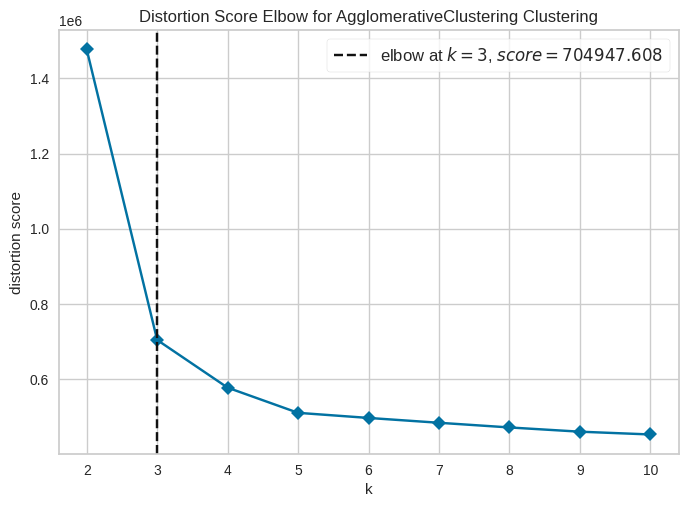

In [239]:
plot_model(hclustModel, plot = 'elbow')

In [240]:
for i in range(3, 6):
    variable_name = f"model_summary_hclust{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6127          3057.0497          0.6315            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.5684          2540.1674          0.8769            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4527          2177.8175          0.9253            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0102,16.5017,8.3718,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

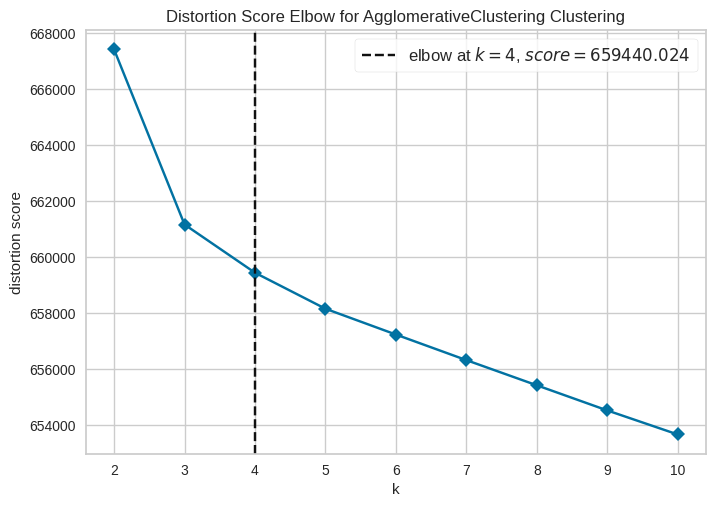

In [241]:
## Performance using "Normalization"
setup(data = data_df, normalize = True, normalize_method = 'zscore', verbose=False)
hclustModel_norm = create_model('hclust')
plot_model(hclustModel_norm, plot = 'elbow')

In [242]:
setup(data = data_df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
hclustModel_norm_3 = create_model('hclust', num_clusters = 3)
model_summary_hclust_norm_3 = pull()

print("For Cluster = 4")
hclustModel_norm_4 = create_model('hclust', num_clusters = 4)
model_summary_hclust_norm_4 = pull()

print("For Cluster = 5")
hclustModel_norm_5 = create_model('hclust', num_clusters = 5)
model_summary_hclust_norm_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0174,23.6671,7.1445,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0102,16.5017,8.3718,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0054,12.7785,11.8605,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [243]:
for i in range(3, 6):
    variable_name = f"model_summary_hclust_norm_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0174            23.6671          7.1445            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0102            16.5017          8.3718            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0054            12.7785         11.8605            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4857,2041.0575,0.7920,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

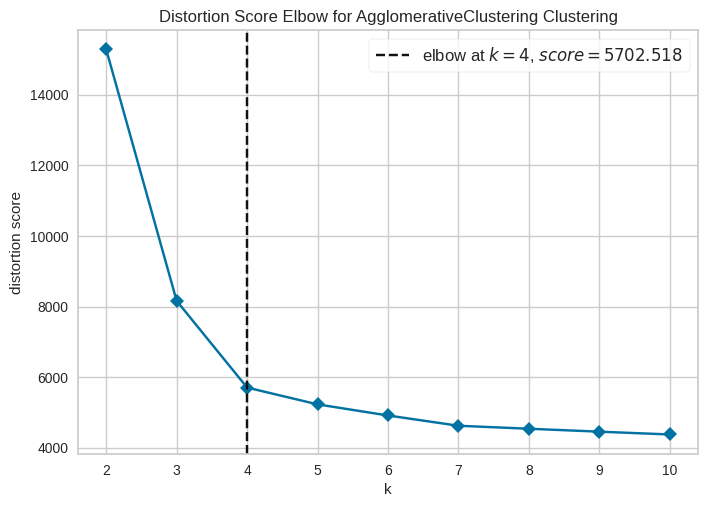

In [244]:
## Performance using "Transformation"

setup(data = data_df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
hclustModel_transformation = create_model('hclust')
plot_model(hclustModel_transformation, plot = 'elbow')

In [245]:
setup(data = data_df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
hclustModel_transformation_3 = create_model('hclust', num_clusters = 3)
model_summary_hclust_transformation_3 = pull()

print("For Cluster = 4")
hclustModel_transformation_4 = create_model('hclust', num_clusters = 4)
model_summary_hclust_transformation_4 = pull()

print("For Cluster = 5")
hclustModel_transformation_5 = create_model('hclust', num_clusters = 5)
model_summary_hclust_transformation_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4929,2020.8014,0.7804,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4857,2041.0575,0.7920,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3900,1686.4963,1.2233,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [246]:
for i in range(3, 6):
    variable_name = f"model_summary_hclust_transformation_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4929          2020.8014          0.7804            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4857          2041.0575           0.792            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0        0.39          1686.4963          1.2233            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5684,2540.1674,0.8769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

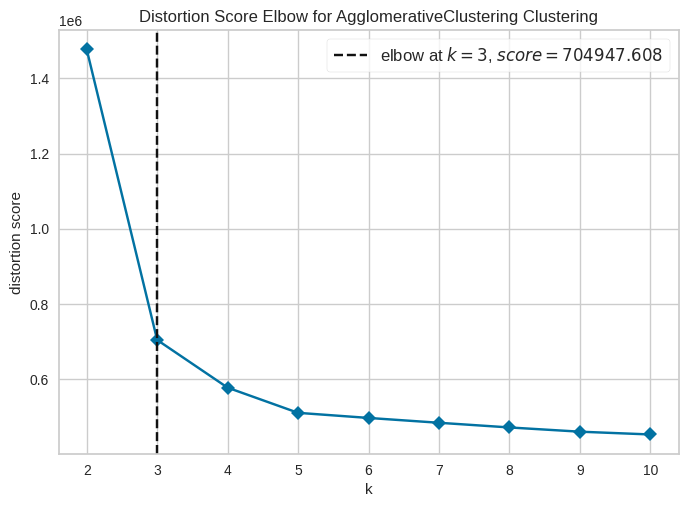

In [247]:
## Performance using "PCA"

setup(data = data_df, pca = True, pca_method = 'linear', verbose=False)
hclustModel_pca = create_model('hclust')
plot_model(hclustModel_pca, plot = 'elbow')

In [248]:
setup(data = data_df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
hclustModel_pca_3 = create_model('hclust', num_clusters = 3)
model_summary_hclust_pca_3 = pull()

print("For Cluster = 4")
hclustModel_pca_4 = create_model('hclust', num_clusters = 4)
model_summary_hclust_pca_4 = pull()

print("For Cluster = 5")
hclustModel_pca_5 = create_model('hclust', num_clusters = 5)
model_summary_hclust_pca_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6127,3057.0497,0.6315,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5684,2540.1674,0.8769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4527,2177.8175,0.9253,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [249]:
for i in range(3, 6):
    variable_name = f"model_summary_hclust_pca_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6127          3057.0497          0.6315            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.5684          2540.1674          0.8769            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4527          2177.8175          0.9253            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

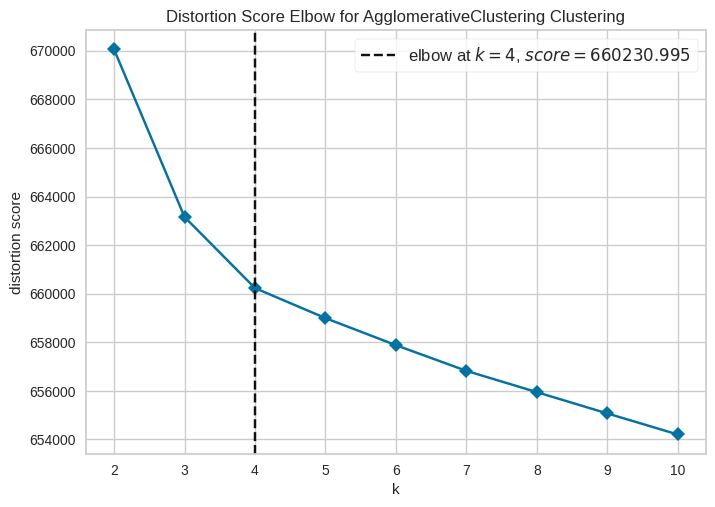

In [188]:
## Performance using "Transformation" + "Normalization"

setup(data = data_df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
hclustModel_TN = create_model('hclust')
plot_model(hclustModel_TN, plot = 'elbow')

In [189]:
setup(data = data_df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
hclustModel_TN_3 = create_model('hclust', num_clusters = 3)
model_summary_hclust_TN_3 = pull()

print("For Cluster = 4")
hclustModel_TN_4 = create_model('hclust', num_clusters = 4)
model_summary_hclust_TN_4 = pull()

print("For Cluster = 5")
hclustModel_TN_5 = create_model('hclust', num_clusters = 5)
model_summary_hclust_TN_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0159,22.3797,7.2650,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0050,12.5052,10.6041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [190]:
for i in range(3, 6):
    variable_name = f"model_summary_hclust_TN_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0159            22.3797           7.265            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0103            16.1596          8.9339            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.005            12.5052         10.6041            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

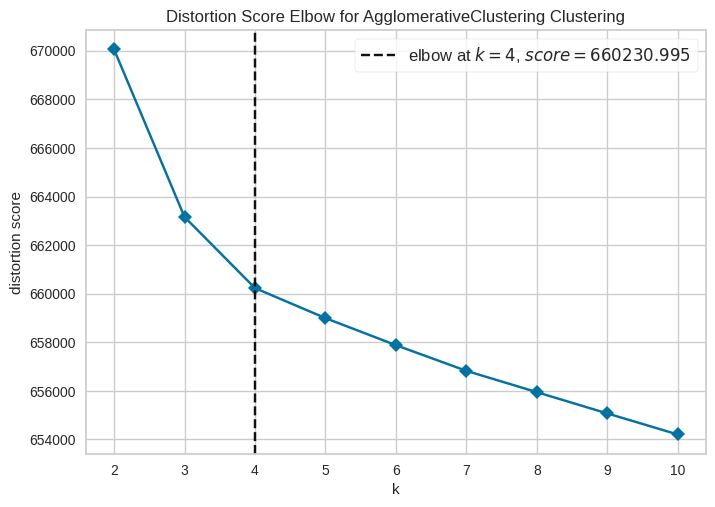

In [191]:
## Performance using "Transformation" + "Normalization" + "PCA"

setup(data = data_df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
hclustModel_TNP = create_model('hclust')
plot_model(hclustModel_TNP, plot = 'elbow')

In [192]:
setup(data = data_df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
hclustModel_TNP_3 = create_model('hclust', num_clusters = 3)
model_summary_hclust_TNP_3 = pull()

print("For Cluster = 4")
hclustModel_TNP_4 = create_model('hclust', num_clusters = 4)
model_summary_hclust_TNP_4 = pull()

print("For Cluster = 5")
hclustModel_TNP_5 = create_model('hclust', num_clusters = 5)
model_summary_hclust_TNP_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0159,22.3797,7.2650,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0050,12.5052,10.6041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [193]:
for i in range(3, 6):
    variable_name = f"model_summary_hclust_TNP_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0159            22.3797           7.265            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0103            16.1596          8.9339            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.005            12.5052         10.6041            0           0   

   Completeness  
0             0  


# **Birch Clustering**

In [255]:
## Birch Clustering

birchParameters = setup(data_df, verbose=False)
birchModel = create_model('birch')
birchPrediction = assign_model(birchModel)
birchPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5684,2540.1674,0.8769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,Cluster
0,P1,11,12,10,8,13,12,14,21,6,...,7,8,10,12,3,7,6,5,10,Cluster 2
1,P2,7,6,3,2,7,1,6,3,3,...,4,5,1,1,4,5,1,6,0,Cluster 0
2,P3,7,11,8,9,10,8,7,13,12,...,14,5,5,7,8,14,8,8,7,Cluster 2
3,P4,12,8,13,5,9,6,9,13,13,...,10,3,4,6,8,14,8,7,8,Cluster 2
4,P5,8,5,13,11,6,7,9,14,9,...,11,7,12,6,6,5,11,8,9,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,1,1,0,0,1,0,0,2,0,Cluster 0
807,P816,0,1,0,0,1,2,2,6,0,...,3,4,2,4,5,5,5,6,5,Cluster 0
808,P817,1,0,0,0,1,1,2,1,1,...,0,0,2,2,0,0,0,4,3,Cluster 0
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,2,0,Cluster 0


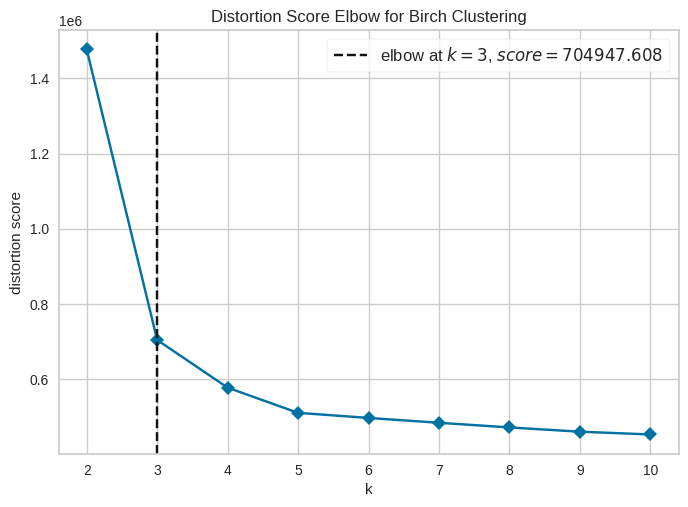

In [195]:
plot_model(birchModel, plot = 'elbow')

In [196]:
## No PreProcessing
setup(data_df, verbose=False)

print("For Cluster = 3")
birchModel_3 = create_model('birch', num_clusters = 3)
model_summary_birch3 = pull()

print("For Cluster = 4")
birchModel_4 = create_model('birch', num_clusters = 4)
model_summary_birch4 = pull()

print("For Cluster = 5")
birchModel_5 = create_model('birch', num_clusters = 5)
model_summary_birch5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6127,3057.0497,0.6315,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5684,2540.1674,0.8769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4527,2177.8175,0.9253,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [197]:
for i in range(3, 6):
    variable_name = f"model_summary_birch{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6127          3057.0497          0.6315            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.5684          2540.1674          0.8769            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4527          2177.8175          0.9253            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0102,16.5017,8.3718,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

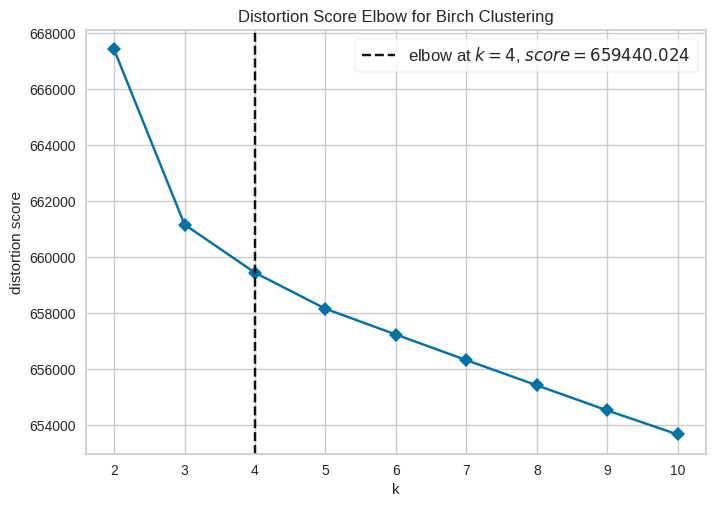

In [198]:
## Performance using "Normalization"
setup(data = data_df, normalize = True, normalize_method = 'zscore', verbose=False)
birchModel_norm = create_model('birch')
plot_model(birchModel_norm, plot = 'elbow')

In [199]:
setup(data = data_df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
birchModel_norm_3 = create_model('birch', num_clusters = 3)
model_summary_birch_norm_3 = pull()

print("For Cluster = 4")
birchModel_norm_4 = create_model('birch', num_clusters = 4)
model_summary_birch_norm_4 = pull()

print("For Cluster = 5")
birchModel_norm_5 = create_model('birch', num_clusters = 5)
model_summary_birch_norm_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0174,23.6671,7.1445,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0102,16.5017,8.3718,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0054,12.7785,11.8605,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [200]:
for i in range(3, 6):
    variable_name = f"model_summary_birch_norm_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0174            23.6671          7.1445            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0102            16.5017          8.3718            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0054            12.7785         11.8605            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4857,2041.0575,0.7920,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

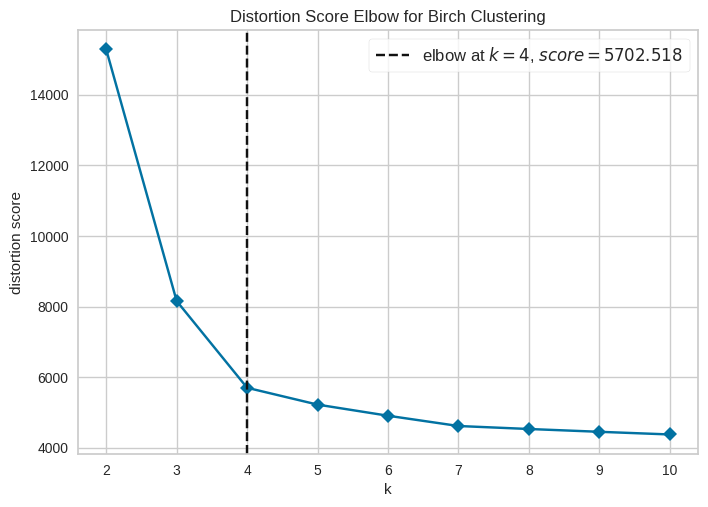

In [201]:
## Performance using "Transformation"

setup(data = data_df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
birchModel_transformation = create_model('birch')
plot_model(birchModel_transformation, plot = 'elbow')

In [202]:
setup(data = data_df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
birchModel_transformation_3 = create_model('birch', num_clusters = 3)
model_summary_birch_transformation_3 = pull()

print("For Cluster = 4")
birchModel_transformation_4 = create_model('birch', num_clusters = 4)
model_summary_birch_transformation_4 = pull()

print("For Cluster = 5")
birchModel_transformation_5 = create_model('birch', num_clusters = 5)
model_summary_birch_transformation_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4929,2020.8014,0.7804,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4857,2041.0575,0.7920,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3802,1686.7655,1.2550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [203]:
for i in range(3, 6):
    variable_name = f"model_summary_birch_transformation_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4929          2020.8014          0.7804            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4857          2041.0575           0.792            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.3802          1686.7655           1.255            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5684,2540.1674,0.8769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

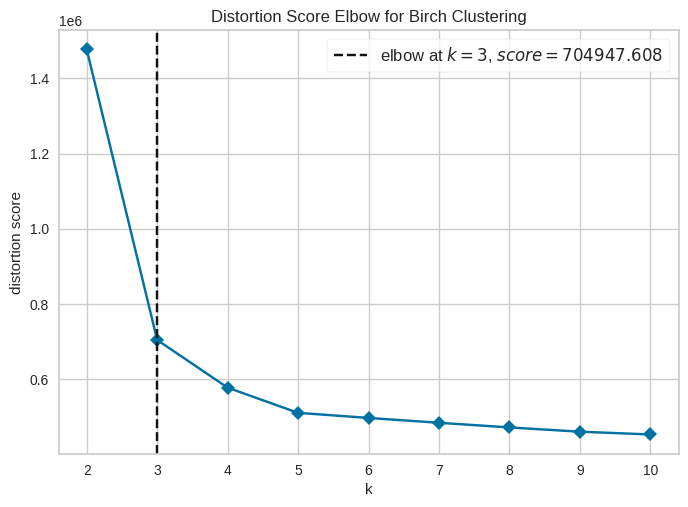

In [204]:
## Performance using "PCA"

setup(data = data_df, pca = True, pca_method = 'linear', verbose=False)
birchModel_pca = create_model('birch')
plot_model(birchModel_pca, plot = 'elbow')

In [205]:
setup(data = data_df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
birchModel_pca_3 = create_model('birch', num_clusters = 3)
model_summary_birch_pca_3 = pull()

print("For Cluster = 4")
birchModel_pca_4 = create_model('birch', num_clusters = 4)
model_summary_birch_pca_4 = pull()

print("For Cluster = 5")
birchModel_pca_5 = create_model('birch', num_clusters = 5)
model_summary_birch_pca_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6127,3057.0497,0.6315,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5684,2540.1674,0.8769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4527,2177.8175,0.9253,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [206]:
for i in range(3, 6):
    variable_name = f"model_summary_birch_pca_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.6127          3057.0497          0.6315            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.5684          2540.1674          0.8769            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4527          2177.8175          0.9253            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

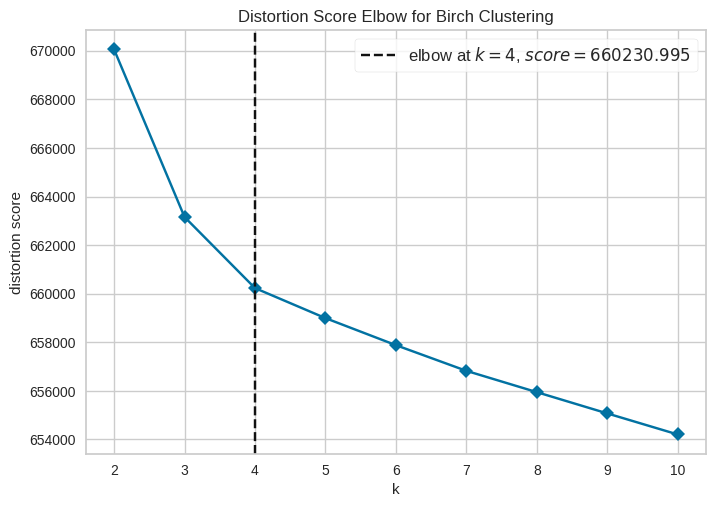

In [207]:
## Performance using "Transformation" + "Normalization"

setup(data = data_df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
birchModel_TN = create_model('birch')
plot_model(birchModel_TN, plot = 'elbow')

In [208]:
setup(data = data_df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
birchModel_TN_3 = create_model('birch', num_clusters = 3)
model_summary_birch_TN_3 = pull()

print("For Cluster = 4")
birchModel_TN_4 = create_model('birch', num_clusters = 4)
model_summary_birch_TN_4 = pull()

print("For Cluster = 5")
birchModel_TN_5 = create_model('birch', num_clusters = 5)
model_summary_birch_TN_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0159,22.3797,7.2650,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0050,12.5052,10.6041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [209]:
for i in range(3, 6):
    variable_name = f"model_summary_birch_TN_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0159            22.3797           7.265            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0103            16.1596          8.9339            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.005            12.5052         10.6041            0           0   

   Completeness  
0             0  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

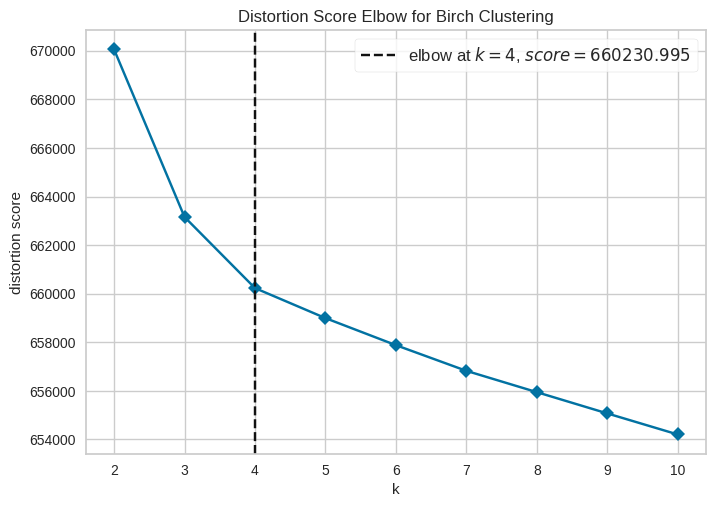

In [210]:
## Performance using "Transformation" + "Normalization" + "PCA"

setup(data = data_df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
birchModel_TNP = create_model('birch')
plot_model(birchModel_TNP, plot = 'elbow')

In [211]:
setup(data = data_df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
birchModel_TNP_3 = create_model('birch', num_clusters = 3)
model_summary_birch_TNP_3 = pull()

print("For Cluster = 4")
birchModel_TNP_4 = create_model('birch', num_clusters = 4)
model_summary_birch_TNP_4 = pull()

print("For Cluster = 5")
birchModel_TNP_5 = create_model('birch', num_clusters = 5)
model_summary_birch_TNP_5 = pull()

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0159,22.3797,7.2650,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0103,16.1596,8.9339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0050,12.5052,10.6041,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [212]:
for i in range(3, 6):
    variable_name = f"model_summary_birch_TNP_{i}"
    print(eval(variable_name))

   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0159            22.3797           7.265            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0103            16.1596          8.9339            0           0   

   Completeness  
0             0  
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.005            12.5052         10.6041            0           0   

   Completeness  
0             0  


# Graphs



> KMeans Clustering



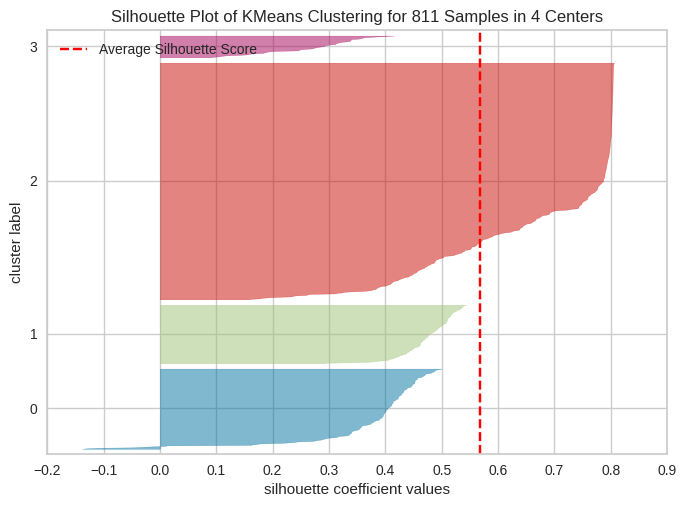

In [254]:
plot_model(KMeansModel, plot = 'distribution')
plot_model(KMeansModel, plot = 'silhouette')
plot_model(KMeansModel, plot = 'tsne')



> Agglomerative Clustering



In [259]:
plot_model(hclustModel, plot = 'distribution')
plot_model(hclustModel, plot = 'tsne')



> Birch Clustering



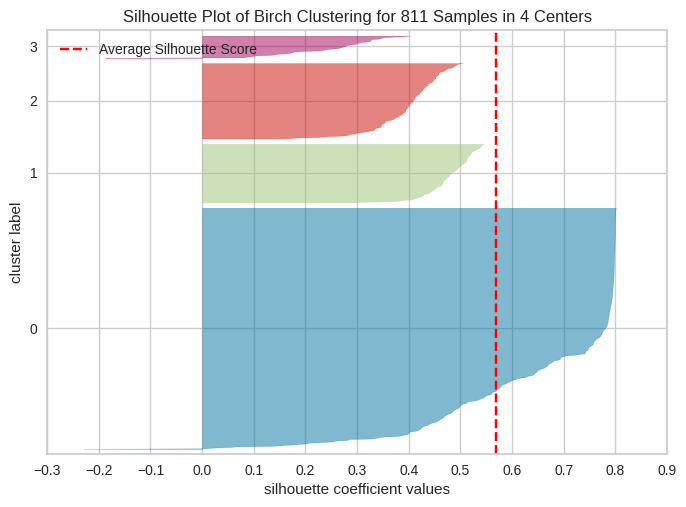

In [258]:
plot_model(birchModel, plot = 'distribution')
plot_model(birchModel, plot = 'silhouette')
plot_model(birchModel, plot = 'tsne')